<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/PersonalProjects/blob/main/01_ENEM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis using data from ENEM 2020

ENEM (Exame Nacional do Ensino Médio, or *Middle School National Exam*) is the largest test for students in the middle school in Brazil. Through ENEM notes, many students go to colleges and universities. ENEM is also a major tool to reduce social inequality in Brazil, since there are social and racial quotas in the program. 

The test is divided in four competences: 

1.   Portuguese and its related topics (LC);
2.   Mathematics and its related topics (MT);
3.   Human sciences and its related topics (CH); and
4.   Nature sciences and its related topics (CN).

Also, students have to write a dissertation over a relevant theme. Grades from each test go from 0 to 1000, and the overall grade of the student can be evaluated by taking the mean of these five grades.

When applying to the test, students are advised to fill a socioeconomic questionnaire, which asks about their family, house, monthly income, and other topics.

**ABOUT THE DATASET**

In this file, we will make an Exploratory Data Analysis (EDA) using data from ENEM 2020. The dataset was found in:

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Through this data, we have access over a large number of students who attended to the test, as well as their notes in each competence.

In [1]:
%reset-f

First, we will import the libraries that we will use in our EDA:

In [2]:
import pandas as pd              # Pandas for data manipulation
import numpy as np               # Importing numpy to use numpy array methods

import seaborn as sns            # Seaborn for data visualization
import matplotlib.pyplot as plt  # Matplotlib also for data visualization

from scipy.stats import ranksums # Ranksums method for hypothesis testing

import random                    # Random library


random.seed(10)                         # Setting the seed

Now, let's start to work on our data.

# Importing the dataset

Our dataset is stored in the .csv file named "MICRODADOS_ENEM_2020.csv". To store it in a dataframe, we can do:

In [3]:
file_name = 'MICRODADOS_ENEM_2020.csv'

dataset = pd.read_csv(file_name, sep = ';', encoding = 'ISO-8859-1')

Note that we used the encoding for 'ISO-8859-1' because 'utf-8' was not able to get the data properly. 

Ok, now let's understand our data:

In [4]:
dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256127 entries, 0 to 256126
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            256127 non-null  int64  
 1   NU_ANO                  256127 non-null  int64  
 2   TP_FAIXA_ETARIA         256127 non-null  int64  
 3   TP_SEXO                 256127 non-null  object 
 4   TP_ESTADO_CIVIL         256127 non-null  int64  
 5   TP_COR_RACA             256127 non-null  int64  
 6   TP_NACIONALIDADE        256127 non-null  int64  
 7   TP_ST_CONCLUSAO         256127 non-null  int64  
 8   TP_ANO_CONCLUIU         256126 non-null  float64
 9   TP_ESCOLA               256126 non-null  float64
 10  TP_ENSINO               91160 non-null   float64
 11  IN_TREINEIRO            256126 non-null  float64
 12  CO_MUNICIPIO_ESC        56693 non-null   float64
 13  NO_MUNICIPIO_ESC        56693 non-null   object 
 14  CO_UF_ESC           

So, we have a very large number of entries in our data frame, and 76 columns. These can be divided in some classes:



*   Columns 0 to 11: Data about the participant;
*   Columns 12 to 18: Data about the participant's school;
*   Columns 19 to 22: Data about the test application place;
*   Columns 23 to 43: Data about the tests for the four competences;
*   Columns 44 to 50: Data about the dissertation;
*   Columns 51 to 75: Data about the socioeconomic questionnaire




For more information about the meaning of each column, the reader is referred to the file "Dicionário_Microdados_Enem_2020.xlsx".

Let's see how many null values we have in each column:



In [5]:
pd.set_option('display.max_rows', 76)

print(dataset.isna().sum())

NU_INSCRICAO                   0
NU_ANO                         0
TP_FAIXA_ETARIA                0
TP_SEXO                        0
TP_ESTADO_CIVIL                0
TP_COR_RACA                    0
TP_NACIONALIDADE               0
TP_ST_CONCLUSAO                0
TP_ANO_CONCLUIU                1
TP_ESCOLA                      1
TP_ENSINO                 164967
IN_TREINEIRO                   1
CO_MUNICIPIO_ESC          199434
NO_MUNICIPIO_ESC          199434
CO_UF_ESC                 199434
SG_UF_ESC                 199434
TP_DEPENDENCIA_ADM_ESC    199434
TP_LOCALIZACAO_ESC        199434
TP_SIT_FUNC_ESC           199434
CO_MUNICIPIO_PROVA             1
NO_MUNICIPIO_PROVA             1
CO_UF_PROVA                    1
SG_UF_PROVA                    1
TP_PRESENCA_CN                 1
TP_PRESENCA_CH                 1
TP_PRESENCA_LC                 1
TP_PRESENCA_MT                 1
CO_PROVA_CN                97258
CO_PROVA_CH                90426
CO_PROVA_LC                90426
CO_PROVA_M

We see that, in many of our columns, there are a lot of missing values. We can assume that these come from students who did not attend to the tests, or students who did not fill the socioeconomic questionnaire, or simply students who refused to give information about their schools or family. Since we have a lot of different variables, we will only perform data treatment if it is necessary. 

In [6]:
pd.set_option('display.max_rows', 10)

# First analyses from our data

So, let's start to make the first analyses from our data. These will be related to the participant's data: let's understand their age, their sex, their race, and whether they have already completed the middle school or not.

## Student's age

First, let's understand the age of our students. The age is stored in  variable TP_FAIXA_ETARIA. This is a numeric variable, but the value stored should be decoded.

In [7]:
dataset['TP_FAIXA_ETARIA'].head(10)

0    11
1    11
2     4
3     2
4     4
5     3
6     9
7     4
8     5
9     2
Name: TP_FAIXA_ETARIA, dtype: int64

To better understand our base of students, we will first decode our data. Note that, in some cases, the dummy variable represents a group of ages. For instance, dummy variable 17 represents ages 56 to 60. In these cases, we will use the average (58). 

Dummy variable 1 represents students with less than 17 years. We will decode then to the age 16. On a similar fashion, dummy variable 20 represents students with more than 70 years, and we will decode them to the age 71. We are doing this so that we are able to visualize our data correctly, getting a good grasp of what it is representing.

In [8]:
decode_age = {1: 16, 2: 17, 3: 18, 4: 19, 5: 20, 6: 21, 7: 22, 8: 23, 9: 24, 10: 25, 11: 28, 12: 27, 13: 38, 14: 43, 15: 48, 16: 53, 17: 58, 18: 63, 19: 68, 20: 71}

dataset['TP_FAIXA_ETARIA'] = dataset['TP_FAIXA_ETARIA'].map(decode_age)

Now, let's plot a histogram for our ages:

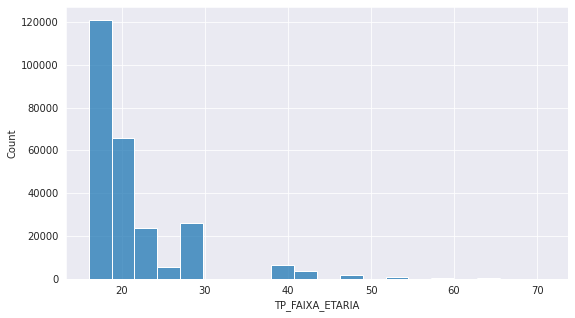

In [9]:
sns.set_style("darkgrid")

plt.figure(figsize=(9, 5))
dist_age = sns.histplot(x = 'TP_FAIXA_ETARIA', data = dataset, bins = 20)

Before going further into our analyses, let's make our graph more pleasing for the viewer.

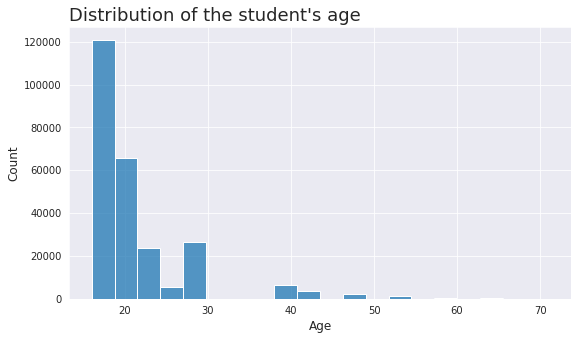

In [10]:
dist_age.set_title("Distribution of the student's age", fontsize = 18, loc = 'left')  # Title
dist_age.set_xlabel('Age', fontsize = 12)                                             # x label
dist_age.set_ylabel('Count', fontsize = 12)                                           # y label

dist_age.get_figure( )


Good. Most of our students have less than 30 years, and a big part of then have less than 25 years. Let's see this in a boxplot:

Text(0, 0.5, 'Age')

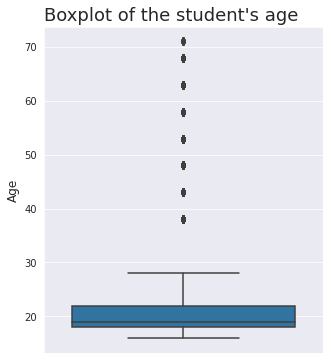

In [11]:
plt.figure(figsize=(5, 6))

boxp_age = sns.boxplot(y = 'TP_FAIXA_ETARIA', data = dataset)

boxp_age.set_title("Boxplot of the student's age", fontsize = 18, loc = 'left')     # Title
# dist_age.set_xlabel('Age', fontsize = 12)                                             
boxp_age.set_ylabel('Age', fontsize = 12)                                           # y label

The boxplot gives us some more information about the distribution. The median of our ages is below 20 years, and all students over 30 years are considered to be outliers from our data. Also, 75% of the students have under than 25 years.

## Student's sex

Let's see if there is any difference in the age distribution of men and women.

Text(0, 0.5, 'Age')

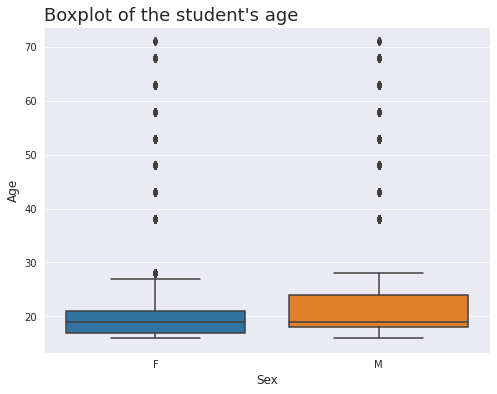

In [12]:
plt.figure(figsize=(8, 6))

boxp_age_sex = sns.boxplot(x = 'TP_SEXO', y = 'TP_FAIXA_ETARIA', data = dataset)

boxp_age_sex.set_title("Boxplot of the student's age", fontsize = 18, loc = 'left')     # Title
boxp_age_sex.set_xlabel('Sex', fontsize = 12)                                           # x label                                             
boxp_age_sex.set_ylabel('Age', fontsize = 12)                                           # y label

There is very little difference in these distributions. Men seem to be slightly older, but the difference is very small. We can show that this difference is not significant by a hypothesis test:

$H^{null}:$ Distribution of the ages is the same in the two groups.

$H^{alt}:$ Distribution of the ages is **not** the same in the two groups.

So, let's separate our two datasets:

In [13]:
dataset_M = dataset[dataset['TP_SEXO'] == 'M']

dataset_F = dataset[dataset['TP_SEXO'] == 'F']

Since our dataset is very large, we may have trouble in making the hypothesis test. Thus, let's take a sample from our set:

In [14]:
dataset_M_s = dataset_M.sample(1000)

dataset_F_s = dataset_F.sample(1000)

Now, let's make a distribution plot for these two sets:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sex = M')

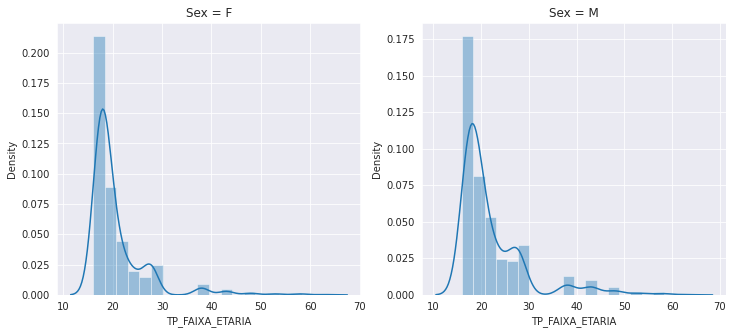

In [15]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

g1 = sns.distplot(dataset_F_s['TP_FAIXA_ETARIA'], bins = 20, ax = axes[0])
g1.set_title('Sex = F')

g2 = sns.distplot(dataset_M_s['TP_FAIXA_ETARIA'], bins = 20, ax = axes[1])
g2.set_title('Sex = M')

So, we can see small differences in these distributions. But: are those differences significant?

We can do our hypothesis test using:

In [16]:
hyp_test = ranksums(dataset_M_s['TP_FAIXA_ETARIA'], dataset_F_s['TP_FAIXA_ETARIA'])

hyp_test.pvalue

5.577681680663452e-06

Since our pvalue was lower than 0.05, we may reject our null hypothesis, and say: our distributions and significantly different. Thus:

$H^{alt}:$ Distribution of the ages is **not** the same in the two groups.

But what is this difference? Let's understand our data a little bit more. Let's group our data using groupby, and then evaluate some descriptive statistics.

In [17]:
dataset_groupby_sex = dataset.groupby('TP_SEXO')

In [18]:
dataset_groupby_sex['TP_FAIXA_ETARIA'].mean( )

TP_SEXO
F    20.747775
M    21.876835
Name: TP_FAIXA_ETARIA, dtype: float64

Men age tend to be slightly higher than women age. The difference is even higher when we look at the third quartile:

In [19]:
dataset_groupby_sex['TP_FAIXA_ETARIA'].quantile(0.75)

TP_SEXO
F    21.0
M    24.0
Name: TP_FAIXA_ETARIA, dtype: float64

So, we see that the age of our students is affected by their sex.

## Student's race

Now, let's understand more about another important variable: student's race. First, let's decode our variable: 

In [20]:
decode_race = {0 : "Not declared", 1 : "White", 2 : "Black", 3 : "Pardo", 4 : "Yellow", 5 : "Indigenous"}

dataset['TP_COR_RACA'] = dataset['TP_COR_RACA'].map(decode_race)

dataset['TP_COR_RACA'].head(10)

0    Black
1    Pardo
2    Pardo
3    Pardo
4    Pardo
5    Pardo
6    Pardo
7    White
8    Pardo
9    Black
Name: TP_COR_RACA, dtype: object

Let's make a countplot to understand about the number of people of each race making the exam:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


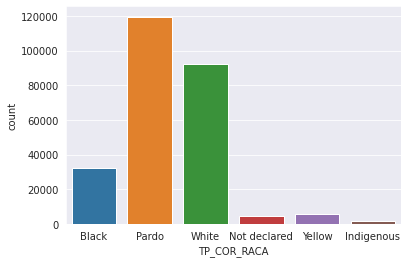

In [21]:
sns.countplot(dataset['TP_COR_RACA'])

So, most of our students are pardos, then white, then black. There is a very low number of students from other ethnicities.

There is another variable which shows if the student attended to a public or a private school. Let's decode the variable:

In [22]:
decode_school_type = {1 : "Not declared", 2 : "Public", 3 : "Private", 4 : "Abroad"}

dataset['TP_ESCOLA'] = dataset['TP_ESCOLA'].map(decode_school_type)

Now let's make a count plot, but let's separate for each type of school:

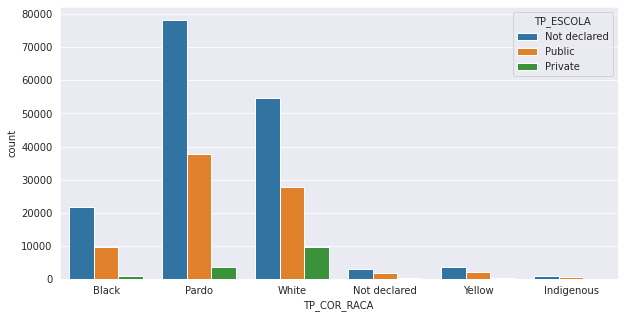

In [23]:
plt.figure(figsize = (10, 5))

sns.countplot(x = 'TP_COR_RACA', hue = 'TP_ESCOLA', data = dataset)

We see that, even though white people are less numeroues than pardo peolple, there is actually more white than pardo people in private schools. 

Let's go further into this:

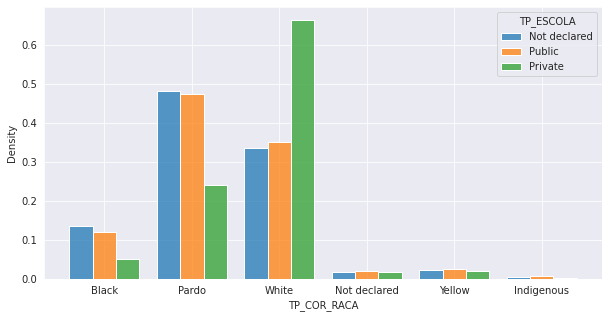

In [24]:
plt.figure(figsize = (10, 5))

sns.histplot(x = dataset['TP_COR_RACA'], hue=dataset['TP_ESCOLA'], multiple="dodge", stat = 'density', shrink = 0.8, common_norm = False)

We see that almost 70% of the students in private schools are white. At the same time, only about 25% of the students are pardo. 

# Checking which student's attended to the exam

Now, let's check which student's attended to the exam. Note that we have four different compentences. Thus, we have four different labels, each related to presence in one of the for tests:

1.   Portuguese and its related topics (LC);
2.   Mathematics and its related topics (MT);
3.   Human sciences and its related topics (CH); and
4.   Nature sciences and its related topics.

Let's create an auxiliary variable to join these four variables. Thus, if any of these is 0, it means that the student did not attend to the exam. Else, the student attended to the exam:

In [25]:
conditions = [((dataset['TP_PRESENCA_CN'] == 1) & (dataset['TP_PRESENCA_CH'] == 1) & (dataset['TP_PRESENCA_LC'] == 1) & (dataset['TP_PRESENCA_MT'] == 1)), (~(dataset['TP_PRESENCA_CN'] == 1) | ~(dataset['TP_PRESENCA_CH'] == 1) | ~(dataset['TP_PRESENCA_LC'] == 1) | ~(dataset['TP_PRESENCA_MT'] == 1))]

values = [1, 0]

In [26]:
dataset['Presence'] = np.select(conditions, values)

Let's check if everything worked out:

In [27]:
dataset[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'Presence']].head(10)

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,Presence
0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,1.0,1.0,1
2,0.0,0.0,0.0,0.0,0
3,1.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,0.0,0
5,1.0,1.0,1.0,1.0,1
6,0.0,0.0,0.0,0.0,0
7,1.0,1.0,1.0,1.0,1
8,1.0,1.0,1.0,1.0,1
9,0.0,0.0,0.0,0.0,0


Great. Now, let's decode our variable:

In [28]:
decode_presence = {0 : "Missed", 1 : "Present"}

dataset['Presence'] = dataset['Presence'].map(decode_presence)

Ok. Now, let's make a count plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


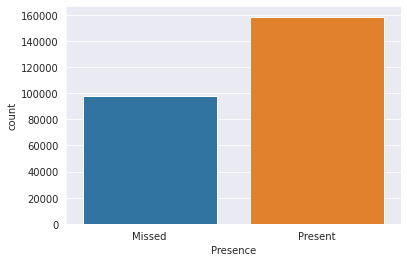

In [29]:
sns.countplot(dataset['Presence'])

So, slightly more students attended to the test.

Let's add a new variable: the school type.

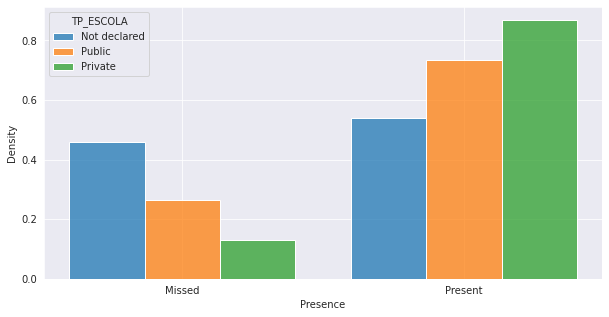

In [30]:
plt.figure(figsize = (10, 5))

sns.histplot(x = dataset['Presence'], hue=dataset['TP_ESCOLA'], multiple="dodge", stat = 'density', shrink = 0.8, common_norm = False)

Note that, in the private school, more than 80% of the students attended to the test. For the public school, however, only slightly more than 60% of the students attended to the test.

Let's to a similar analysis, now for the sex:

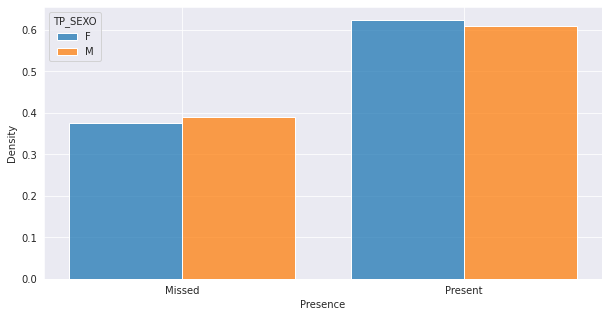

In [31]:
plt.figure(figsize = (10, 5))

sns.histplot(x = dataset['Presence'], hue=dataset['TP_SEXO'], multiple="dodge", stat = 'density', shrink = 0.8, common_norm = False)

There is very little difference here. Sex does not seem to affect if one attends or not to the test.

# Analyzing grades obtained

Ok, now let's look at the grades obtained for each competence. First, let's get some descriptive statistics for each competence. For the portuguese exam:

In [36]:
dataset['NU_NOTA_LC'].describe( )

count    165701.000000
mean        533.616302
std          73.078124
min           0.000000
25%         489.400000
50%         539.200000
75%         584.800000
max         767.600000
Name: NU_NOTA_LC, dtype: float64

On average, people scored 533 on the exam. The maximum grade was 767.7. It is important to note that, on ENEM, due to how each question is weighted, the maximum grade (if one gets all the answers right) is not 1000. That also means that the test for a competence can be more important than the test for the other, in terms of the approval of the student in a university. For instance, let's make a similar analysis for the mathematics exam:

In [37]:
dataset['NU_NOTA_MT'].describe( )

count    158869.000000
mean        531.052104
std         121.939640
min           0.000000
25%         432.100000
50%         515.200000
75%         615.300000
max         975.000000
Name: NU_NOTA_MT, dtype: float64

Here, the maximum grade is much higher. The mean is almost the same. However, there is a higher deviation on mathematics grades: while some people perform very well, other perform very poorly. A high deviation means that the average difference of each grade from the mean grade is higher.

We can also note this looking at the quantiles: 25% of the students scored less than 432 in mathematics. In portuguese, 25% of the studentes scored less than 489.

Now, let's look at human sciences:

In [39]:
dataset['NU_NOTA_CH'].describe( )

count    165701.000000
mean        526.035778
std          97.037315
min           0.000000
25%         451.900000
50%         528.200000
75%         596.700000
max         844.000000
Name: NU_NOTA_CH, dtype: float64

Again, the mean grade is very similar, and the maximum grade is also different. Now, for nature sciences:

In [40]:
dataset['NU_NOTA_CN'].describe( )

count    158869.000000
mean        499.011148
std          82.845947
min           0.000000
25%         432.700000
50%         493.200000
75%         559.600000
max         843.300000
Name: NU_NOTA_CN, dtype: float64

The mean is the lowest for nature sciences. However, the first quartile was still higher than for mathematics. 

The highest maximum grade is seen in mathematics.

Let's take a look at the histogram of the grades for each competence.

Text(0.5, 1.0, 'Nature sciences')

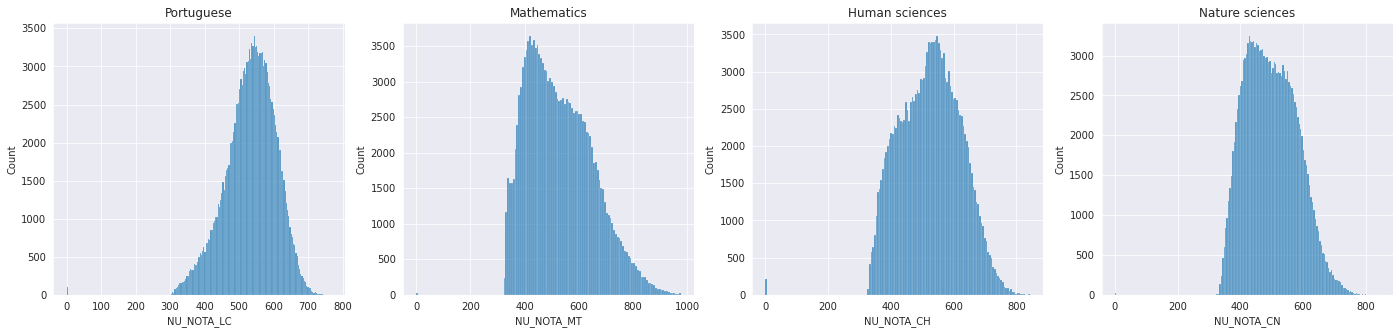

In [58]:
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(24, 5)

g1 = sns.histplot(dataset['NU_NOTA_LC'], ax = axes[0])
g1.set_title('Portuguese')

g2 = sns.histplot(dataset['NU_NOTA_MT'], ax = axes[1])
g2.set_title('Mathematics')

g3 = sns.histplot(dataset['NU_NOTA_CH'], ax = axes[2])
g3.set_title('Human sciences')

g4 = sns.histplot(dataset['NU_NOTA_CN'], ax = axes[3])
g4.set_title('Nature sciences')

For nature science and mathematics, the distribution is right-skewed (especially for the latter). This means that most of the students perform worse than the mean value, which is affected by a group of students that often do much better than the others.

For human sciences and portuguese (especially for the latter), the distribution is left-skewed, which means that the inverse happens. 

In [47]:
print(f"Portuguese: 2Q - 1Q = {round(dataset['NU_NOTA_LC'].quantile(0.50) - dataset['NU_NOTA_LC'].quantile(0.25), 2)}; 3Q - 2Q = {round(dataset['NU_NOTA_LC'].quantile(0.75) - dataset['NU_NOTA_LC'].quantile(0.50), 2)}")

Portuguese: 2Q - 1Q = 49.8; 3Q - 2Q = 45.6


For portuguese, since 2Q - 1Q > 3Q - 2Q, the distribution is left-skewed.

In [48]:
print(f"Mathematics: 2Q - 1Q = {round(dataset['NU_NOTA_MT'].quantile(0.50) - dataset['NU_NOTA_MT'].quantile(0.25), 2)}; 3Q - 2Q = {round(dataset['NU_NOTA_MT'].quantile(0.75) - dataset['NU_NOTA_MT'].quantile(0.50), 2)}")

Mathematics: 2Q - 1Q = 83.1; 3Q - 2Q = 100.1


For mathematics, the inverse happens. This means that the distribution is right-skewed.

Another interesting idea that we can look for is: are grades from different competences correlated? Do students who usually get higher grades in a specific competence also get higher grades in the others? 

Let's analyze this using a pairplot. First, to make our analysis easier, let's make a sample of our data:

In [51]:
dataset_sample1000 = dataset.sample(1000)

Now, let's draw our pairplot:

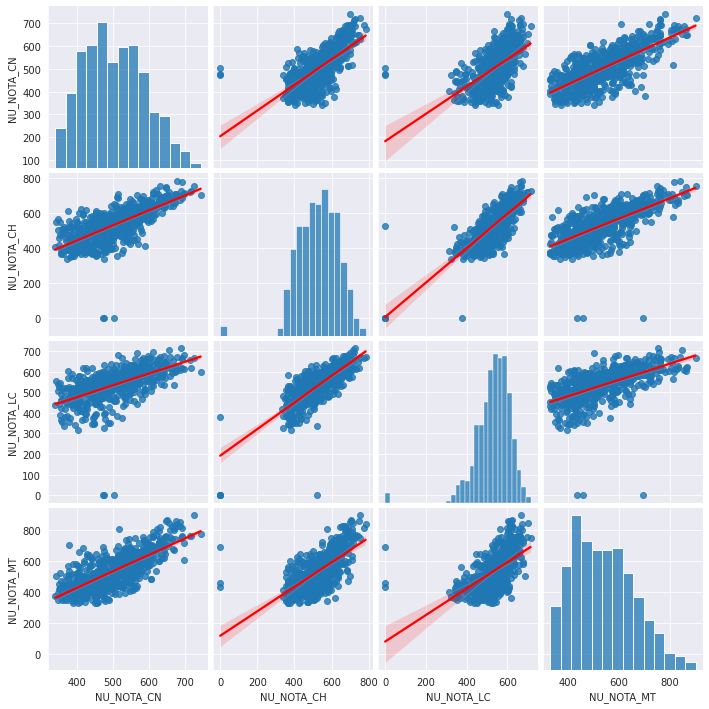

In [52]:
sns.pairplot(dataset_sample1000[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']], kind = 'reg', plot_kws={'line_kws':{'color':'red'}})

We can see that students who get higher grades in a competence usually get higher grades in the others. For a better grasp at this, let's see a heat map for the correlation:

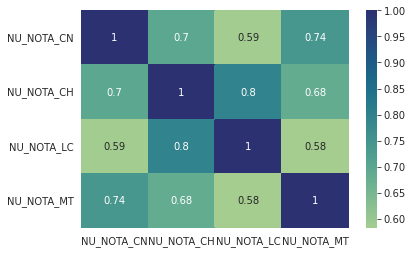

In [56]:
sns.heatmap(dataset_sample1000[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr( ), annot = True, cmap = 'crest')

Here, there is a very interesting result: the grades from human sciences and portuguese are very well correlated ($\rho = 0.80$). On a lower degree, so do the grades for mathematics and nature sciences ($\rho = 0.74$). 

The worst correlation is seem when we pair the grades for mathematics and portuguese: $\rho = 0.59$.

Now, let's delve into the grades obtained for the dissertation. First, getting the descriptive statistics:

In [59]:
dataset['NU_NOTA_REDACAO'].describe( )

count    165701.000000
mean        632.911690
std         202.326345
min           0.000000
25%         520.000000
50%         620.000000
75%         800.000000
max        1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

Note that, for the dissertation, there is no weighting of different questions. Thus, the maximum grade is indeed 1000.0. 

For the dissertation, the mean grade is 632, and the deviation is the highest: 202.3. Also, only 25% do more than 800.0 points. Let's look at a histogram:

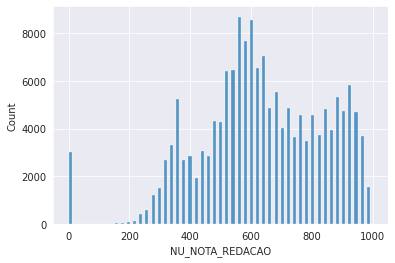

In [61]:
sns.histplot(dataset['NU_NOTA_REDACAO'])

Note that graded for the dissertation are discrete: They are only defined in steps of 20. Now, let's add the dissertation grades to the heatmap:

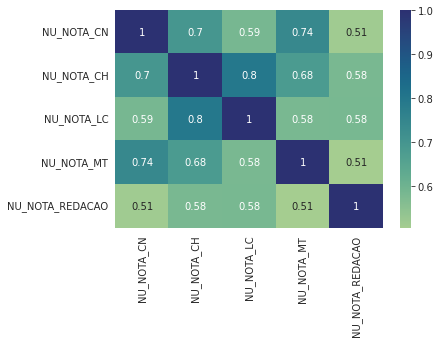

In [65]:
sns.heatmap(dataset_sample1000[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr( ), annot = True, cmap = 'crest')

The correlation between the grades obtained in the dissertation and in the tests is very low. However, the highest correlation is seem between the portuguese and human sciences tests.

Now that we have analyzed the grade of each competence and the dissertation separetely, let's create a new column to get the average grade for the student:

In [78]:
dataset['AVG_GRADE'] = dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis = 1).round(2)

dataset[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'AVG_GRADE']].head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,AVG_GRADE
0,NaN,NaN,NaN,NaN,NaN,NaN
1,604.1,661.7,595.3,711.3,580.0,630.48
2,NaN,NaN,NaN,NaN,NaN,NaN
3,620.8,675.0,624.2,759.4,760.0,687.88
4,NaN,NaN,NaN,NaN,NaN,NaN
5,498.1,604.7,505.4,526.7,700.0,566.98
6,NaN,NaN,NaN,NaN,NaN,NaN
7,604.6,604.8,562.1,753.2,600.0,624.94
8,439.7,383.5,486.2,448.5,600.0,471.58
9,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's try to make a joint plot between the average grade and the age. First, to avoid any problems, let's only get the entries where we have a non-null average grade:

In [79]:
dataset_treat_grade = dataset[~dataset['AVG_GRADE'].isna( )]
dataset_treat_grade[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'AVG_GRADE']].head(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,AVG_GRADE
1,604.1,661.7,595.3,711.3,580.0,630.48
3,620.8,675.0,624.2,759.4,760.0,687.88
5,498.1,604.7,505.4,526.7,700.0,566.98
7,604.6,604.8,562.1,753.2,600.0,624.94
8,439.7,383.5,486.2,448.5,600.0,471.58
11,491.1,631.4,627.9,546.5,640.0,587.38
18,422.4,488.1,559.1,420.3,800.0,537.98
19,486.0,503.3,439.8,405.6,500.0,466.94
22,660.6,667.2,593.6,746.4,920.0,717.56
23,NaN,398.3,336.5,NaN,520.0,418.27


Note that the null values here likely represent students who did not attend to the test.

Now, plotting the joint plot:

<Figure size 720x1368 with 0 Axes>

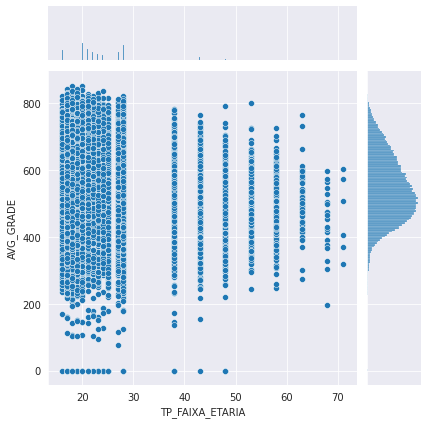

In [83]:
plt.figure(figsize=(10, 19))

sns.jointplot(x = dataset['TP_FAIXA_ETARIA'], y = dataset['AVG_GRADE'], kind = 'scatter')

The joint plot allows us to see information about the data distribution and correlation in the same figure.

# Analyzing the socioeconomic quiz

To end our analyzes, let's study the socioeconomic quiz. Here, students are advised to declare their housing, family, and study conditions. 

First, let's analyze their family monthly income. These are divided into 17 groups:


* A: No income

* B: < BRL 1,045.00

* C: BRL 1,045.00 < x < BRL 1,567.50

* D: BRL 1,567.50 < x < BRL 2,090.00

* E: BRL 2,090.00 < x < BRL 2,612.50

* F: BRL 2,612.50 < x < BRL 3,135.00

* G: BRL 3,135.00 < x < BRL 4,180.00

* H: BRL 4,180.00 < x < BRL 5,225.00

* I: BRL 5,225.00 < x < BRL 6,270.00

* J: BRL 6,270.00 < x < BRL 7,315.00

* K: BRL 7,315.00 < x < BRL 8,360.00

* L: BRL 8,360.00 < x < BRL 9,405.00

* M: BRL 9,405.00 < x < BRL 10,450.00

* N: BRL 10,450.00 < x < BRL 12,540.00

* O: BRL 12,540.00 < x < BRL 15,675.00

* P: BRL 15,675.00 < x < BRL 20,900.00

* Q: > BRL 20,900.00

For reference, by March 2022, the average family income in Brazil is about BRL 2,489.00:  

https://www.cnnbrasil.com.br/business/renda-media-do-brasileiro-cai-11-no-trimestre-ate-janeiro-queda-anual-chega-a-97/

Thus, the average brazilian family would be in the E group.

Now, let's get a count plot for the family income:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


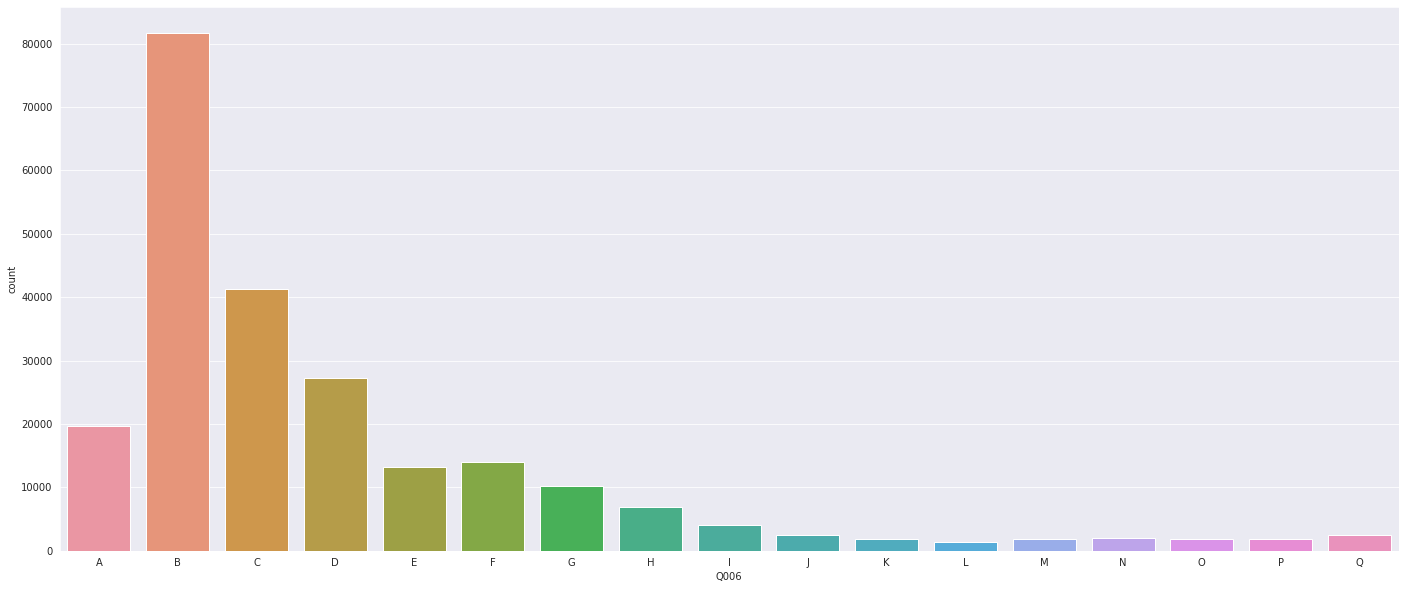

In [86]:
plt.figure(figsize = (24, 10))
sns.countplot(dataset['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

Most of our students say that they come from a family with a B-level income, which means that their income is actually less than BRL 1,045.00. Let's try to analyze this for different school types. First, let's create auxiliary datasets to separate the data:

In [90]:
dataset_public = dataset[dataset['TP_ESCOLA'] == 'Public']
dataset_privat = dataset[dataset['TP_ESCOLA'] == 'Private']

In [93]:
dataset_public['Q006'].head(10)

2       B
3     NaN
9       B
25    NaN
36      B
57      A
61      C
63      B
65      B
73      B
Name: Q006, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Private')

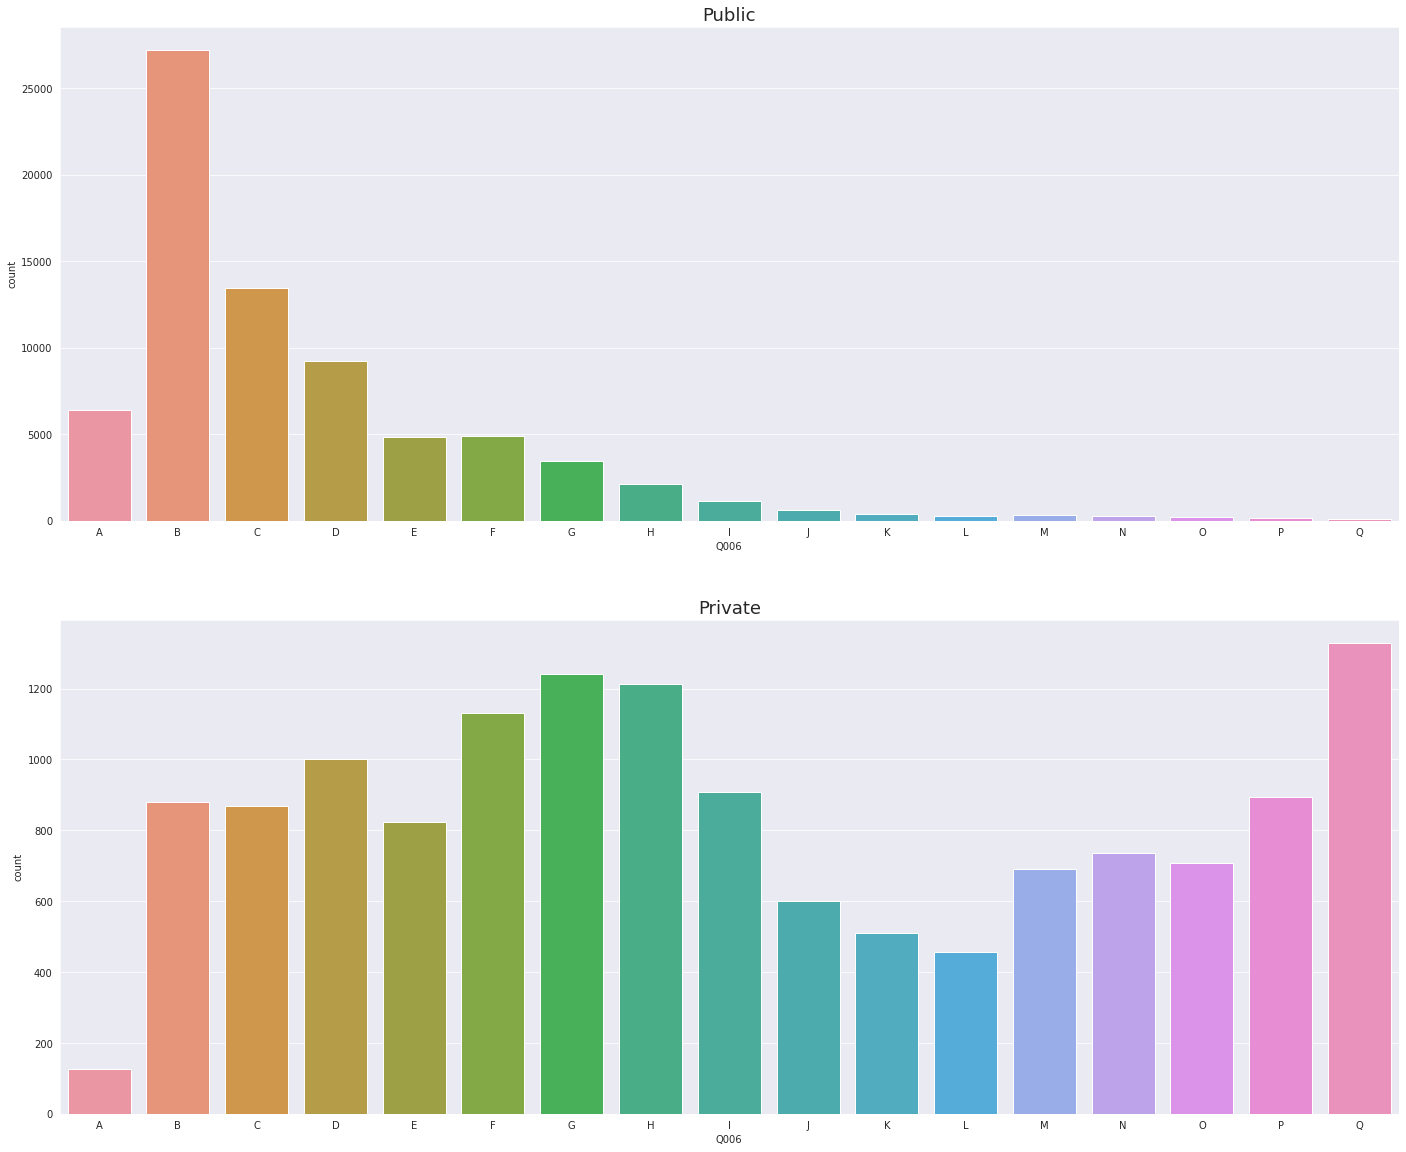

In [96]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(24, 20)

g1 = sns.countplot(dataset_public['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax = axes[0])
g1.set_title('Public', fontsize = 18)

g2 = sns.countplot(dataset_privat['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax = axes[1])
g2.set_title('Private', fontsize = 18)

In public schools, the distribution is very similar to the general distribution: most students come from families with very low income. For private school students, however, the distribution is much more uniform. Also, most students come from families with a very high monthly income (> BRL 20,900.00).

Now let's try differentiating students by race:

In [98]:
dataset_white = dataset[dataset['TP_COR_RACA'] == 'White']
dataset_black = dataset[dataset['TP_COR_RACA'] == 'Black']
dataset_pardo = dataset[dataset['TP_COR_RACA'] == 'Pardo']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Pardo')

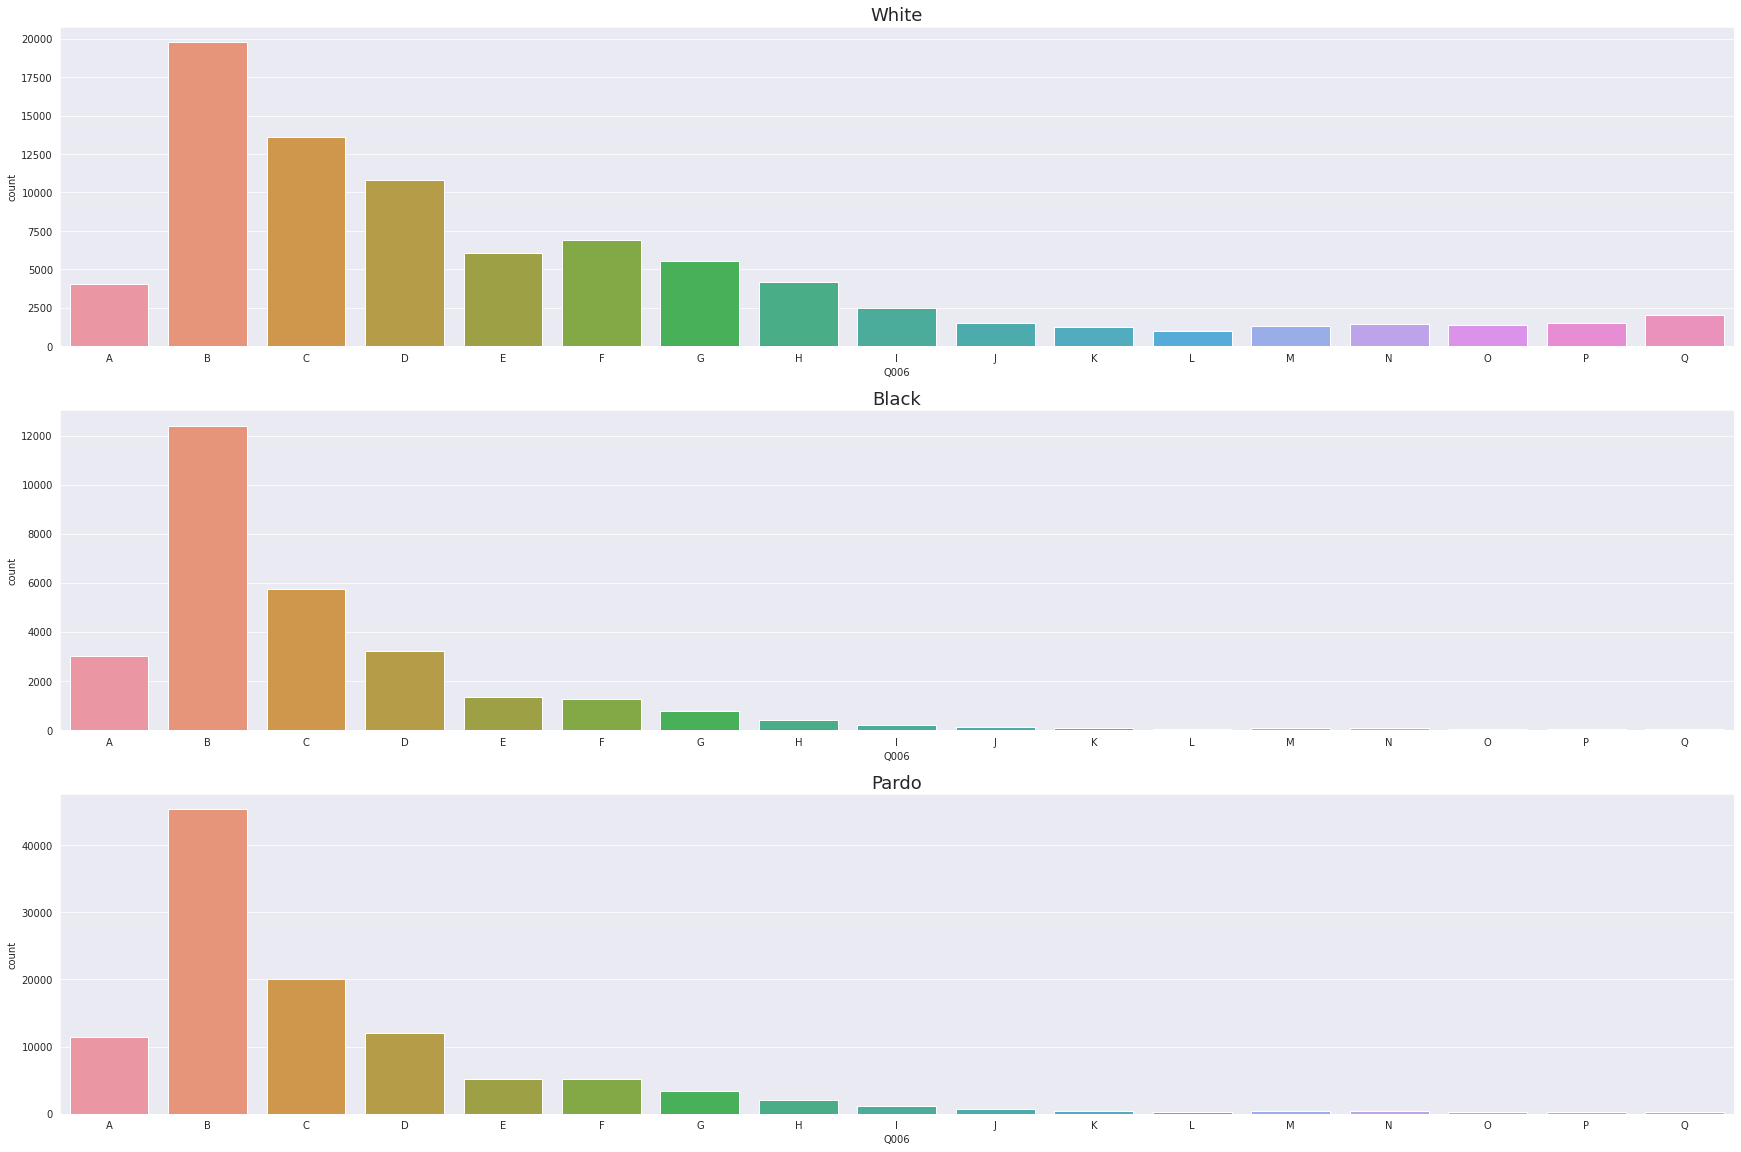

In [99]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(30, 20)

g1 = sns.countplot(dataset_white['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax = axes[0])
g1.set_title('White', fontsize = 18)

g2 = sns.countplot(dataset_black['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax = axes[1])
g2.set_title('Black', fontsize = 18)

g3 = sns.countplot(dataset_pardo['Q006'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax = axes[2])
g3.set_title('Pardo', fontsize = 18)

While distribution for black and pardo people is very similar, distribution for white people shows a larger number of people on levels with higher monthly income. 

And how does the family income affects the student's grade? 

In [102]:
dataset_groupby_income = dataset.groupby('Q006')

In [106]:
pd.set_option('display.max_rows', 1000)
dataset_groupby_income['AVG_GRADE'].mean( )

Q006
A    481.249825
B    505.551813
C    533.259982
D    548.555125
E    567.016771
F    578.542392
G    598.006798
H    612.297128
I    625.469267
J    632.411348
K    639.979746
L    640.889191
M    645.593107
N    654.577482
O    661.366254
P    669.892487
Q    676.412304
Name: AVG_GRADE, dtype: float64

In [ ]:
pd.set_option('display.max_rows', 10)

We can see that the average grade actually gradually increases as the monthly income increases. Actually, there is a very strong relationship between declared income and average grade.

Let's visualize this by looking at a violin plot:

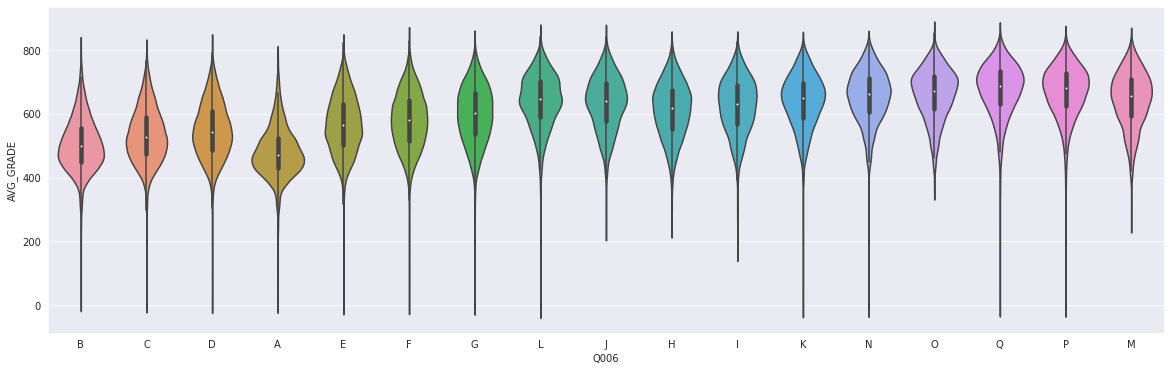

In [101]:
plt.figure(figsize = (20, 6))

sns.violinplot(y = dataset['AVG_GRADE'], x = dataset['Q006'])